<a href="https://colab.research.google.com/github/CarineMS/UFV/blob/main/Semana_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit-optimize

## Libs

In [4]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from skopt import gp_minimize

In [ ]:
#baseline 76.555%
#modelo 3 76.794%
# modelo 5 77.5%

***
## Load Data

In [5]:
# abrir o datase de treino e teste

train = pd.read_csv('sample_data/train.csv')
test = pd.read_csv('sample_data/test.csv')

***
## Preprocessing

### Descrição Estatística das Features Numéricas

In [6]:
# descrição estátistica das features núméricas
est = train.describe()
est

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### Verificando valores nulos ou NAN

In [8]:
# verificar valores nulos ou NAN
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
# mapear as colunas
col = pd.Series(list(train.columns))

In [11]:
X_train = train.drop(['PassengerId', 'Survived'], axis = 1)
X_test = test.drop(['PassengerId'], axis = 1)

***
## Create Features

In [12]:
# criar feature

def criar_features(X):
  subs = {'female':1, 'male':0}
  X['mulher'] = X['Sex'].replace(subs)

  X['Fare'] = X['Fare'].fillna(X['Fare'].mean())

  X['Age'] = X['Age'].fillna(X['Age'].mean())

  X['Embarked'] = X['Embarked'].fillna('S')

  subs = {'S':1, 'C':2, 'Q':3}
  X['porto'] = X['Embarked'].replace(subs)

  X['crianca'] = 1
  X['crianca'] = np.where(X['Age'] < 12, 1, 0)

  return X

In [13]:
X_train = criar_features(X_train)
X_test = criar_features(X_test)

<ipython-input-12-4ac394b943fa>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['mulher'] = X['Sex'].replace(subs)
<ipython-input-12-4ac394b943fa>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['porto'] = X['Embarked'].replace(subs)
<ipython-input-12-4ac394b943fa>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

***
## Select Features

In [14]:
# Selecionar as features

features = ['Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'mulher', 'porto', 'crianca']

X_train = X_train[features]
X_test = X_test[features]

y_train = train['Survived']

***
## Visualize

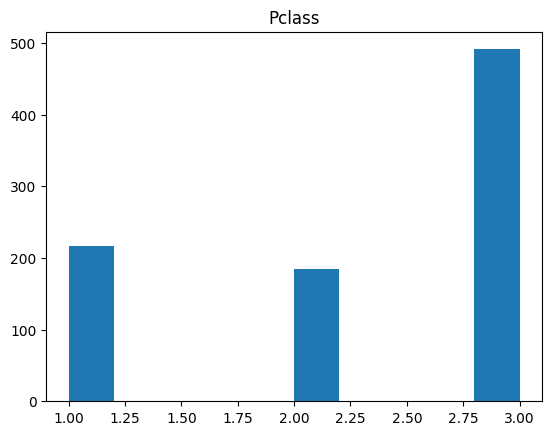

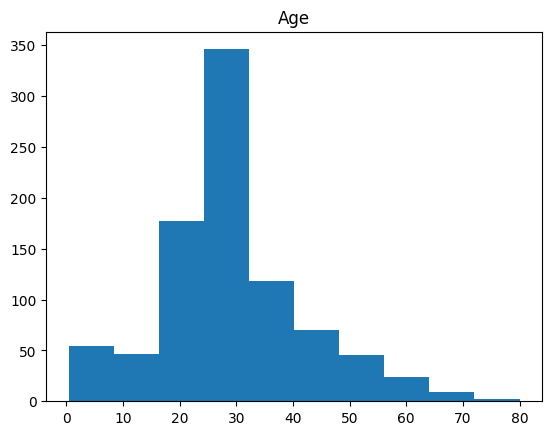

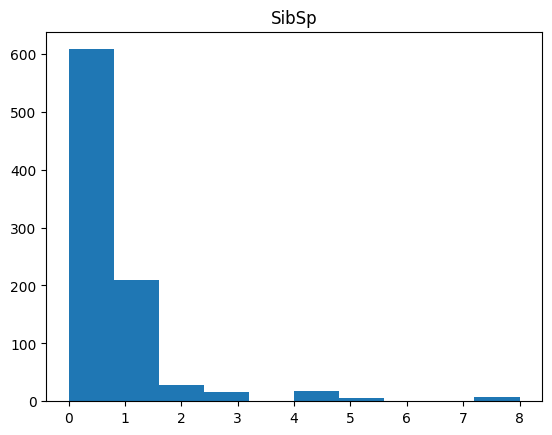

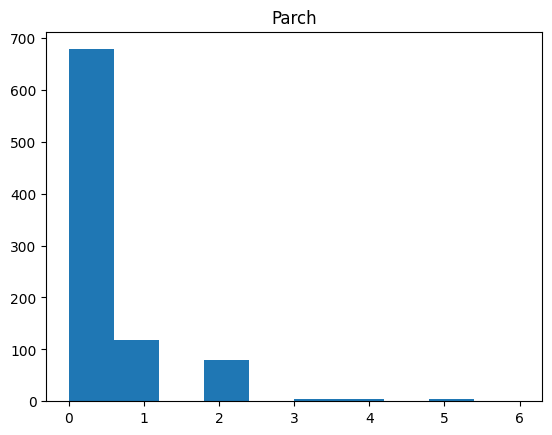

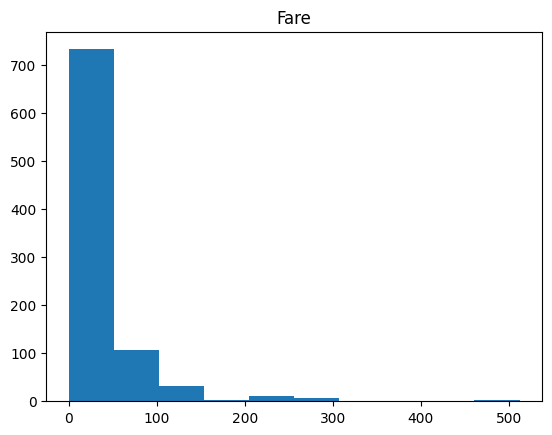

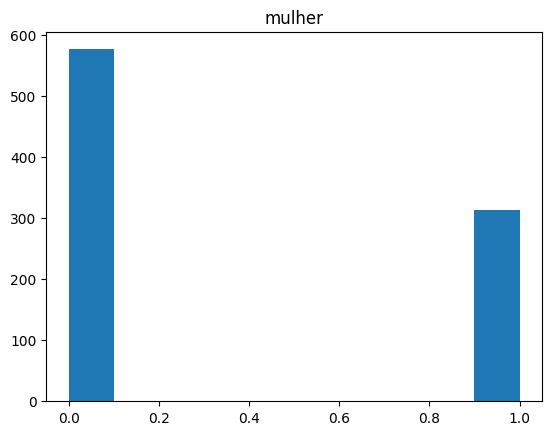

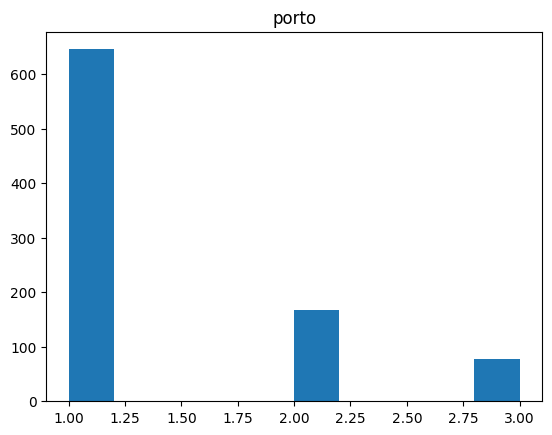

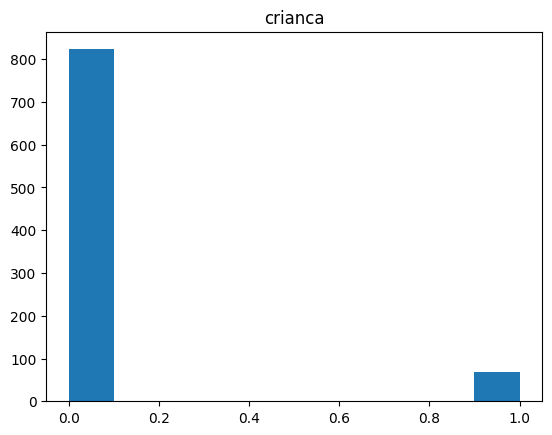

In [15]:
# Visualização

for i in X_train.columns:
    plt.hist(X_train[i])
    plt.title(i)
    plt.show()


In [16]:
# Groupy

gp = train.groupby(['Survived']).count()
gp

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [17]:
# pivot_table

table = pd.pivot_table(train, index = ['Survived'], columns = ['Pclass'], values = 'PassengerId', aggfunc = 'count')
table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


***
## Standardization and Normalization

In [18]:
# Padronização das variáveis

scaler = StandardScaler() #media 0 e desvio padrão 1

X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)


***
## Modeling and Cross Validation

### Logistic Regression

In [ ]:
# Logistic Regression
model_lr = LogisticRegression (random_state= 0 )

score = cross_val_score(model_lr, X_train_sc, y_train, cv = 10)

print(np.mean(score))

0.8047066167290886


### Naive Bayes

In [ ]:
# Naive Bayes para Classificação
model_nb = GaussianNB()

score = cross_val_score(model_nb, X_train_sc, y_train, cv = 10)

print(np.mean(score))

0.8036079900124845


 ### KNN

In [ ]:
# KNN para classificação
model_knn = KNeighborsClassifier(n_neighbors= 5, p = 2)

score = cross_val_score(model_knn, X_train_sc, y_train, cv = 10)

print(np.mean(score))

0.811498127340824


### SVM

In [ ]:
# SVM para classificação
model_svc = SVC(C = 3, kernel = 'rbf', degree = 2, gamma = 0.1)

score = cross_val_score(model_svc, X_train_sc, y_train, cv = 10)

print(np.mean(score))


0.8316479400749064


### Decision Tree

In [ ]:
# Decision Tree
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_split = 2, min_samples_leaf = 1, random_state = 0)

score = cross_val_score(model_dt, X_train_sc, y_train, cv = 10)

print(np.mean(score))

0.8170536828963796


### Random Forest

In [ ]:
# Random Forest
model_rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, max_depth = 5, min_samples_split = 2, min_samples_leaf = 1, random_state = 0)

score = cross_val_score(model_rf, X_train_sc, y_train, cv = 10)

print(np.mean(score))


0.8261048689138576


***
## Hyperparameter Optimization

In [19]:
# Otimização de hiperparametros RF
def treinar_modelo_rf(parametros):

  model_rf = RandomForestClassifier(criterion = parametros[0],
                                    n_estimators = parametros[1],
                                    max_depth = parametros[2],
                                    min_samples_split = parametros[3],
                                    min_samples_leaf = parametros[4],
                                    random_state = 0,
                                    n_jobs = -1 )

  score = cross_val_score(model_rf, X_train_sc, y_train, cv = 10)

  mean_score = np.mean(score)

  print(np.mean(score))

  return -mean_score

In [20]:
parametros = [('entropy', 'gini'),
              (100, 1000),
              (3, 20),
              (2, 10),
              (1, 10)]


otimos_rf = gp_minimize(treinar_modelo_rf, parametros, random_state = 0, verbose = 1, n_calls = 30, n_random_starts = 10  )
print(otimos_rf.fun, otimos_rf.x)

Iteration No: 1 started. Evaluating function at random point.
0.8227465667915107
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 38.8943
Function value obtained: -0.8227
Current minimum: -0.8227
Iteration No: 2 started. Evaluating function at random point.
0.829450686641698
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 10.4170
Function value obtained: -0.8295
Current minimum: -0.8295
Iteration No: 3 started. Evaluating function at random point.
0.8249937578027466
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 13.5377
Function value obtained: -0.8250
Current minimum: -0.8295
Iteration No: 4 started. Evaluating function at random point.
0.8227340823970037
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 10.4090
Function value obtained: -0.8227
Current minimum: -0.8295
Iteration No: 5 started. Evaluating function at random point.
0.8272409488139825
Iteration No: 5 ended. Evaluation done at random point.
Time

In [21]:
# Otimização de hiperparametros SVC
def treinar_modelo_svc(parametros):

  model_svc = SVC(C=parametros[0], # C
                  kernel=parametros[1], # kernel
                  degree=parametros[2], # degree
                  gamma=parametros[3]  # gamma
  )

  score = cross_val_score(model_svc, X_train_sc, y_train, cv = 10)

  mean_score = np.mean(score)

  print(np.mean(score))

  return -mean_score

In [29]:
parametros_svc = [(1, 10),
              ('rbf', 'linear','poly'),
              (1, 5),
              (0.1, 0.5)]


otimos_svc = gp_minimize(treinar_modelo_svc, parametros_svc, random_state = 0, verbose = 1, n_calls = 30, n_random_starts = 10  )
print(otimos_svc.fun, otimos_svc.x)

Iteration No: 1 started. Evaluating function at random point.
0.7811985018726592
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 12.6499
Function value obtained: -0.7812
Current minimum: -0.7812
Iteration No: 2 started. Evaluating function at random point.
0.7923595505617979
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.0849
Function value obtained: -0.7924
Current minimum: -0.7924
Iteration No: 3 started. Evaluating function at random point.
0.7923595505617979
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.4976
Function value obtained: -0.7924
Current minimum: -0.7924
Iteration No: 4 started. Evaluating function at random point.
0.8204369538077403
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 2.0131
Function value obtained: -0.8204
Current minimum: -0.8204
Iteration No: 5 started. Evaluating function at random point.
0.8204369538077403
Iteration No: 5 ended. Evaluation done at random point.
Time t

In [30]:
# Usando os dados do autotunning

model_rf = RandomForestClassifier(criterion=otimos_rf.x[0],
                                  n_estimators= otimos_rf.x[1],
                                  max_depth=otimos_rf.x[2],
                                  min_samples_split=otimos_rf.x[3],
                                  min_samples_leaf=otimos_rf.x[4],
                                  random_state=0,
                                  n_jobs=-1)
model_svc = SVC(C=otimos_svc.x[0],
                kernel=otimos_svc.x[1],
                degree=otimos_svc.x[2],
                gamma=otimos_svc.x[3])


***
## Ensanble Model

In [33]:
# Ensanble model (Voting)
model_voting = VotingClassifier(estimators = [('SVC', model_svc), ('RF', model_rf)], voting = 'hard') # svc and rf 0.8392 # lr, knn, svc and rf 0.8328

model_voting.fit(X_train_sc, y_train)

score = cross_val_score(model_voting, X_train_sc, y_train, cv = 10)

print(np.mean(score))

0.8338951310861423


***
## Final Model

In [ ]:
# # modelo final
# model_rf = RandomForestClassifier(criterion = otimos.x[0], n_estimators = otimos.x[1], max_depth = otimos.x[2],
#                                     min_samples_split = otimos.x[3], min_samples_leaf = otimos.x[4], random_state = 0, n_jobs = -1 )

# model_rf.fit(X_train_sc, y_train)

# y_pred = model_rf.predict(X_train_sc)

# mc = confusion_matrix(y_train, y_pred)
# print(mc)

# score = model_rf.score(X_train_sc, y_train)
# print(score)

***
## Predict and Creating Data for Submission

In [34]:
# predição nos dados de teste
y_pred = model_voting.predict(X_test_sc)

submission = pd.DataFrame(test['PassengerId'])

submission['Survived'] = y_pred

submission.to_csv('submission.csv', index = False)

## Result Kaggle
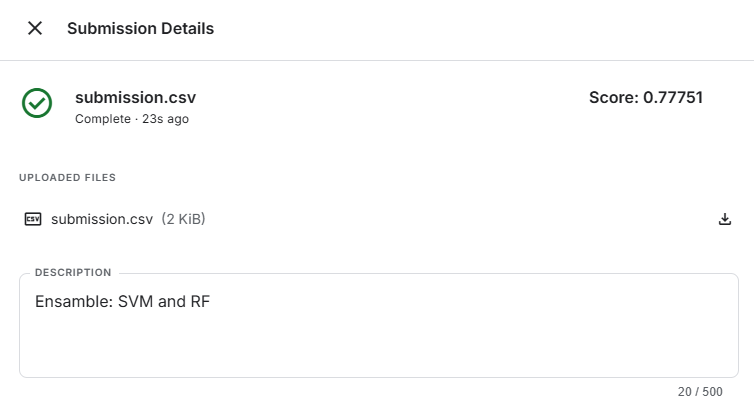

A estrutura do código se manteve, contendo como alterações pontos específicos:

* Tunagem dos hiperparâmetros do modelo SVC
  *  Para esse processo, estabeleceu-se as mesmas características de 30 chamadas e 10 resultados aletórios iniciais.
  * Resultado:
    * Score: -0.8350187265917605
    * Parametros: [C=9, kernel='rbf', degree=1, gamma=0.10203671500965422]
* Optou-se por manter o ensanble, entretanto, retirou-se Logistic Regression e o modelo KNN.

O resultado obtido no Kaggle foi de 77,75% de acurácia. Melhora sutil ao ser comparado com o resultado do Professor Sarvio Valente.